# Importing and Preparing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rcParams
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import font_manager as fm


import warnings
warnings.filterwarnings(action='ignore')
import os

In [2]:
df =pd.read_csv(r"C:\Users\kelvin\OneDrive\Desktop\DataScience\credit_risk_dataset_training.csv")
print(df.shape)
df.head()

(22850, 12)


person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          23          65500                  RENT                4.0   
3          21           9900                   OWN                2.0   
4          26          77100                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C      35000          15.23            1   
3     VENTURE          A       2500           7.14            1   
4   EDUCATION          B      35000          12.42            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.53                         N                           2  
3                 0.25                         N                           2  
4                 0.45                         N                           3

In [3]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              613
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2147
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

<Figure size 432x432 with 0 Axes>

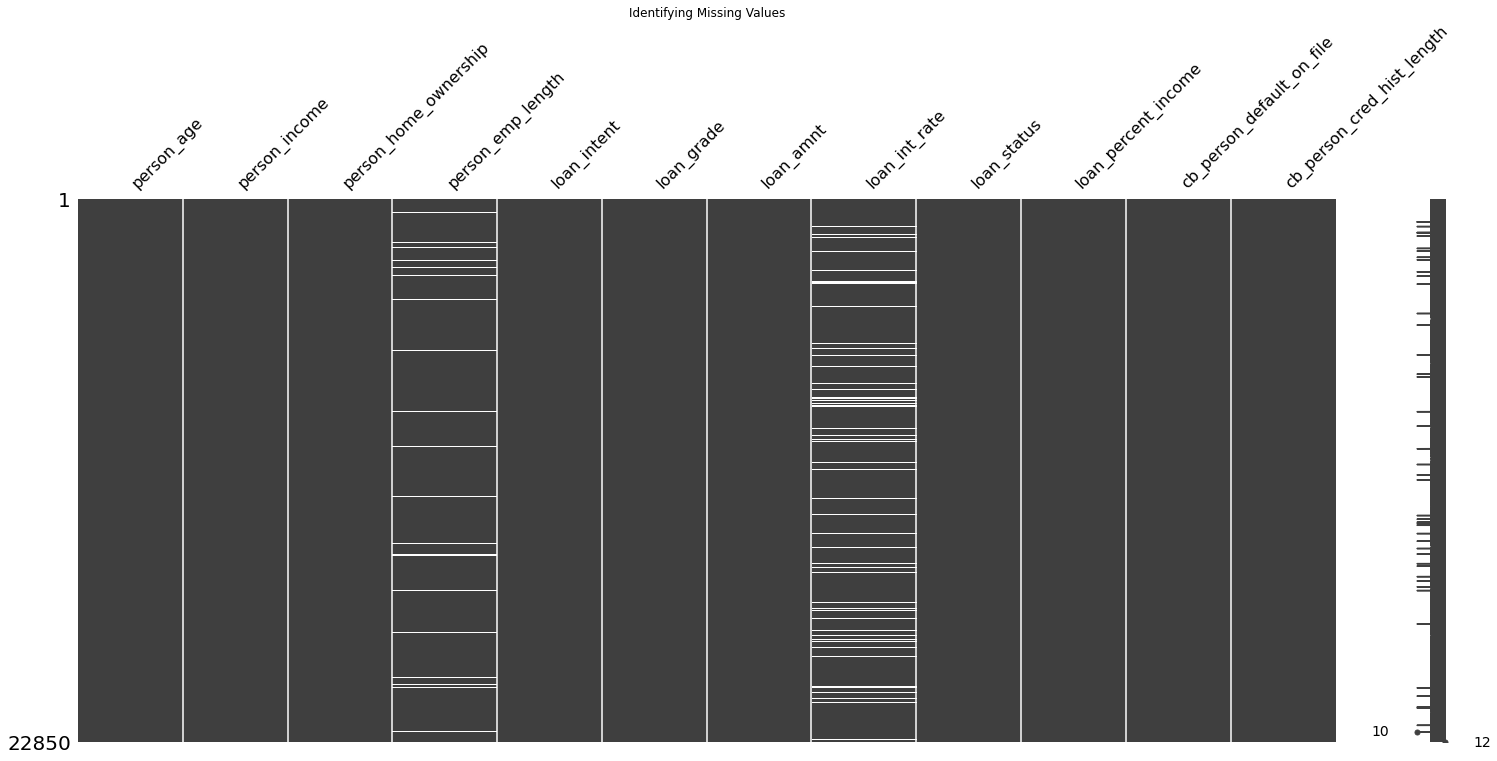

In [4]:
import missingno  as msn
plt.figure(figsize=(6,6))
msn.matrix(df)
plt.title('Identifying Missing Values');

In [5]:
def clean_column(cols):
    avg = cols.mean()
    return cols.fillna(avg)

df_clean = df.transform(clean_column)

In [6]:
df_clean.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [7]:
df_clean.select_dtypes('number').describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  22850.000000   2.285000e+04       22850.000000  22850.000000   
mean      27.717812   6.604363e+04           4.800018   9595.500000   
std        6.327822   6.423370e+04           4.056851   6327.603663   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.840000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.939500e+04           7.000000  12250.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   22850.000000  22850.000000         22850.000000   
mean       11.014324      0.220306             0.170243   
std         3.087864      0.414462             0.106557   
min         5.420000      0.000000             0.000000   
25%         8.490000      0.000000             0.090000   
50%        11.014324      0.000000             0.150000   
75%        13.110000      0.000000             0.230000   
max        23.220000      1.000000             0.780000   

       cb_person_cred_hist_length  
count                22850.000000  
mean                     5.801400  
std                      4.050767  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

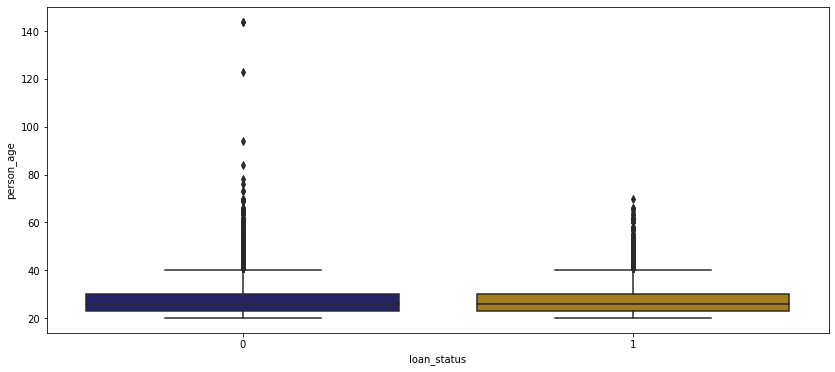

In [8]:
                    #using plotly
# df_tips = px.data.tips()
# px.box(df_clean, x= "loan_status",y="person_age",points = 'all')

                    #using seaborn
plt.figure(figsize=(14,6))    
# sns.set(style='darkgrid')
sns.boxplot(x="loan_status",y="person_age",data=df_clean,palette= ['#191970','#b8860b']);

In [9]:
print('Number of Outliers')
print(df_clean['person_age'].between(0,100).value_counts())
print('------------------------------------------------------------------------------------------------------------------------')
print('Viewing all dataset with Outliers')
df_clean[df_clean['person_age']>100]


Number of Outliers
True     22847
False        3
Name: person_age, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Viewing all dataset with Outliers


person_age  person_income person_home_ownership  person_emp_length  \
138           144         200000              MORTGAGE                4.0   
514           123          78000                  RENT                7.0   
22646         144        6000000              MORTGAGE               12.0   

      loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
138     EDUCATION          B       6000      11.860000            0   
514       VENTURE          B      20000      11.014324            0   
22646    PERSONAL          C       5000      12.730000            0   

       loan_percent_income cb_person_default_on_file  \
138                   0.03                         N   
514                   0.26                         N   
22646                 0.00                         N   

       cb_person_cred_hist_length  
138                             2  
514                             4  
22646                          25

In [10]:
upper_q =df_clean['person_age'].quantile(0.999879)
lower_q = df_clean['person_age'].quantile(0.0001)
df_clean[df_clean['person_age'].between(lower_q,upper_q)]

dfclean = df_clean[df_clean['person_age'].between(lower_q,upper_q)]
dfclean.shape

(22847, 12)

# Data Exploration

# PART 1     

0    0.779665
1    0.220335
Name: loan_status, dtype: float64


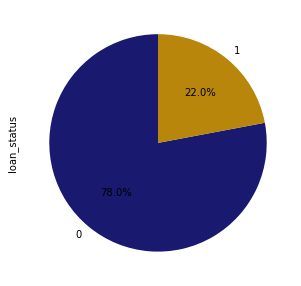

In [11]:
dfclean['loan_status'].value_counts().plot(kind='pie',figsize=(5, 5),autopct='%1.1f%%',
                                         startangle=90, 
                                         colors = ['#191970', '#b8860b'])
                                          
                                        
print(dfclean['loan_status'].value_counts(normalize=True))

What is the scatterplot Loan for Defaulters and Non-Defaulters?

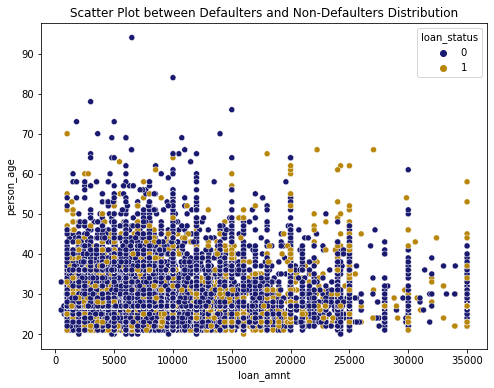

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(dfclean['loan_amnt'],dfclean['person_age'],hue=dfclean['loan_status'],palette = ['#191970', '#b8860b'])
plt.title('Scatter Plot between Defaulters and Non-Defaulters Distribution');

In [13]:
print(round(dfclean[dfclean['loan_status']==0]['person_age'].corr(dfclean['loan_amnt']),0))
print(round(dfclean[dfclean['loan_status']==1]['person_age'].corr(dfclean['loan_amnt']),0))

0.0
0.0


In [14]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

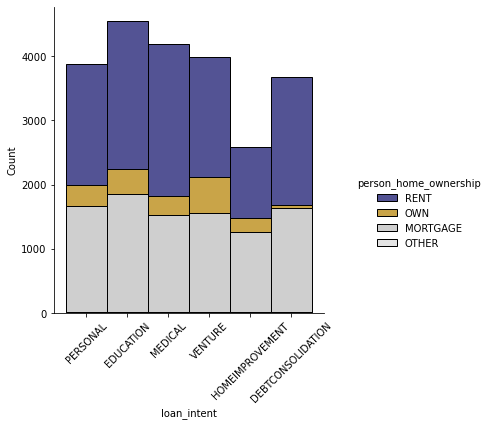

<Figure size 576x720 with 0 Axes>

In [15]:
sns.displot(data=dfclean ,x ='loan_intent',hue = 'person_home_ownership',multiple='stack',
         palette= ['#191970','#b8860b','#c0c0c0','#dcdcdc']);  
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.figure(figsize=(8,10));

[None, None, None, None, None, None, None, None, None, None, None, None]

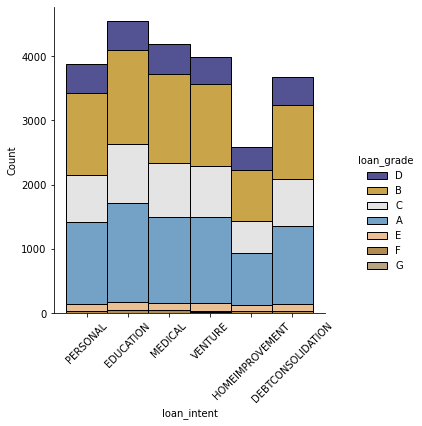

In [16]:
sns.displot(data=dfclean ,x ='loan_intent',hue = 'loan_grade',multiple='stack',
          palette= ['#191970','#b8860b','#dcdcdc','#4682b4','#e5aa70','#996515','#a28557']);  
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

In [17]:
dfclean['cb_person_default_on_file'].value_counts(normalize=True)

N    0.822909
Y    0.177091
Name: cb_person_default_on_file, dtype: float64

[None, None, None, None, None, None, None, None, None, None, None, None]

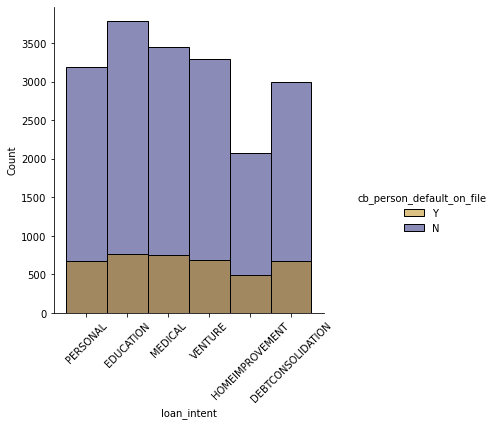

In [18]:
sns.displot(data=dfclean ,x ='loan_intent',hue= 'cb_person_default_on_file',
            palette= ['#b8860b','#191970']);  
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

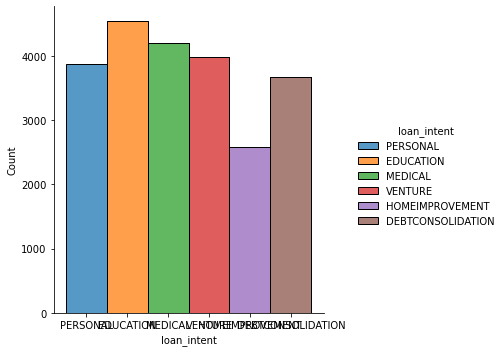

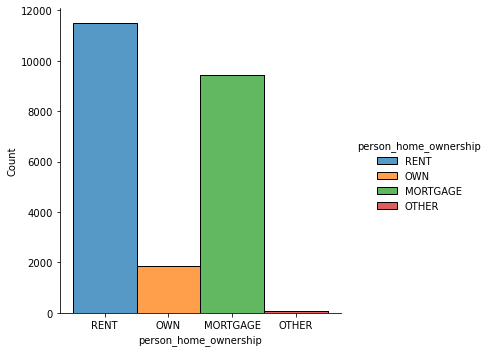

<Figure size 576x432 with 0 Axes>

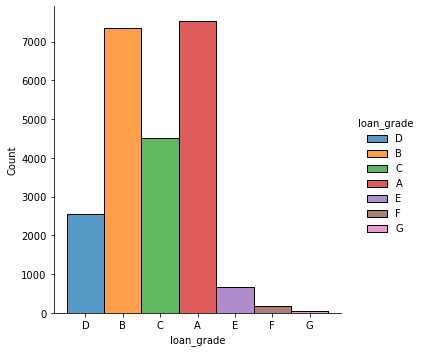

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

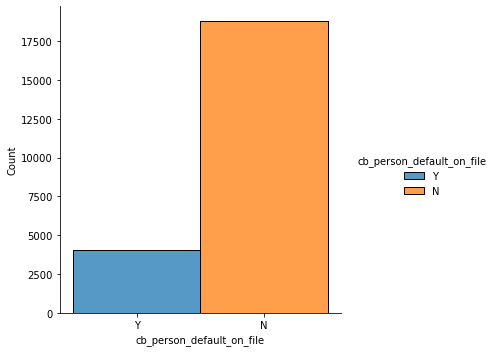

In [19]:
colors1=['#483d8b','#0000cd','#1d2951','#daa520','#f3e5ab','#9b870c','#e5aa70']

k=dfclean.select_dtypes('object')
for i,col in enumerate(k.columns):
    plt.figure(i)
    plt.figure(figsize=(8,6))
    sns.displot(data=k[col] ,x =k[col],hue = k[col],multiple='stack');     

In [20]:
dfcorr = dfclean.select_dtypes('number')
col_names = ['age','income','emp_length','amnt','int_rate','status','percent_income','cred_hist_length']
dfcorr.columns =col_names
dfcorr.corr()

age    income  emp_length      amnt  int_rate  \
age               1.000000  0.140140    0.166510  0.048046  0.012235   
income            0.140140  1.000000    0.149051  0.329548  0.000935   
emp_length        0.166510  0.149051    1.000000  0.108600 -0.052553   
amnt              0.048046  0.329548    0.108600  1.000000  0.142173   
int_rate          0.012235  0.000935   -0.052553  0.142173  1.000000   
status           -0.018257 -0.173994   -0.078318  0.106768  0.317130   
percent_income   -0.044384 -0.301270   -0.050537  0.573519  0.114079   
cred_hist_length  0.877503  0.120715    0.145044  0.040936  0.018586   

                    status  percent_income  cred_hist_length  
age              -0.018257       -0.044384          0.877503  
income           -0.173994       -0.301270          0.120715  
emp_length       -0.078318       -0.050537          0.145044  
amnt              0.106768        0.573519          0.040936  
int_rate          0.317130        0.114079          0.018586  
status            1.000000        0.377689         -0.013178  
percent_income    0.377689        1.000000         -0.033514  
cred_hist_length -0.013178       -0.033514          1.000000

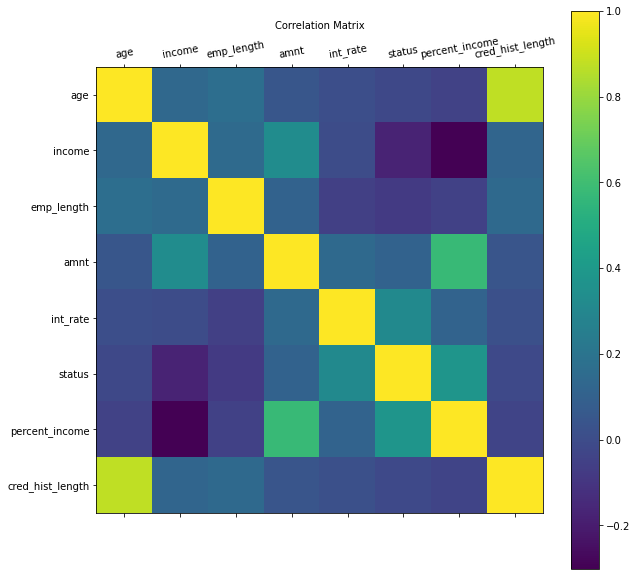

In [21]:
f=plt.figure(figsize=(10,10))
plt.matshow(dfcorr.select_dtypes('number').corr(), fignum=f.number)
plt.xticks(range(dfcorr.select_dtypes('number').shape[1]),dfcorr.select_dtypes(['number']).columns,fontsize=10,rotation=10)
plt.yticks(range(dfcorr.select_dtypes('number').shape[1]),dfcorr.select_dtypes(['number']).columns,fontsize=10)
cb = plt.colorbar()

cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix',fontsize=10);
plt.show()

Compare the Loan intention and add trendline to gaugec equality?

loan_intent
HOMEIMPROVEMENT      73216.624515
PERSONAL             66778.555728
DEBTCONSOLIDATION    66700.272405
VENTURE              66357.658543
EDUCATION            64238.699516
MEDICAL              60591.892993
Name: person_income, dtype: float64

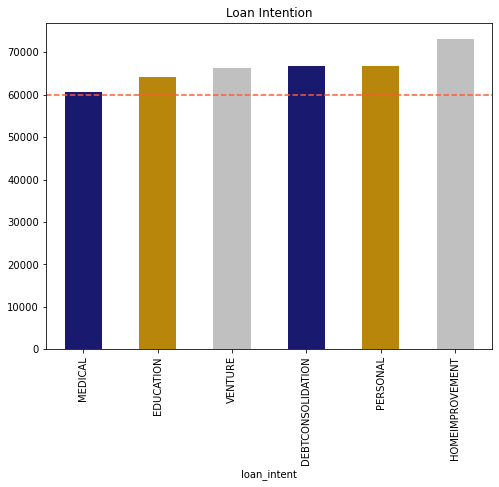

In [22]:
dfclean.groupby(['loan_intent'])['person_income'].mean().sort_values().plot(kind='bar',figsize=(8,6),
                            color=['#191970','#b8860b','#c0c0c0'])
plt.title('Loan Intention')
plt.axhline(y = 60000, color ="#ff5a36", linestyle ="--");
dfclean.groupby(['loan_intent'])['person_income'].mean().sort_values(ascending=False)

Compare the asset(person_home_ownership) and identify the least and most category for our borrowers.

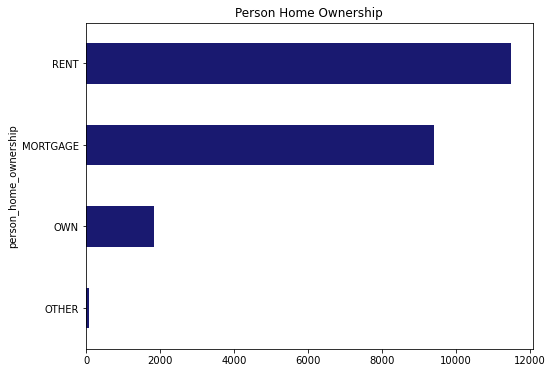

In [23]:
dfclean.groupby('person_home_ownership')['loan_status'].count().sort_values().plot(kind='barh',figsize=(8,6),color='#191970');
dfclean.groupby('person_home_ownership')['loan_status'].count()
plt.title("Person Home Ownership");

Compared different grade available

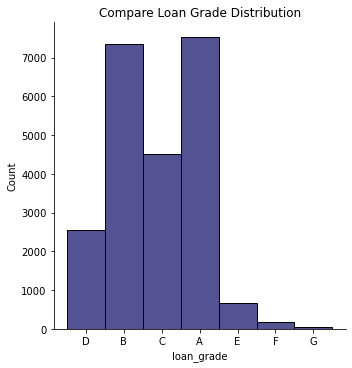

In [24]:
dfclean.groupby('loan_grade')['loan_status'].count().sort_values()
sns.displot(dfclean['loan_grade'],bins=False,kde=False,color='#191970')
plt.title('Compare Loan Grade Distribution');

            Non-Defaulters  Defaulters
loan_grade                            
A                   6779.0         755
B                   6137.0        1219
C                   3570.0         942
D                   1029.0        1531
E                    246.0         427
F                     52.0         120
G                      NaN          40


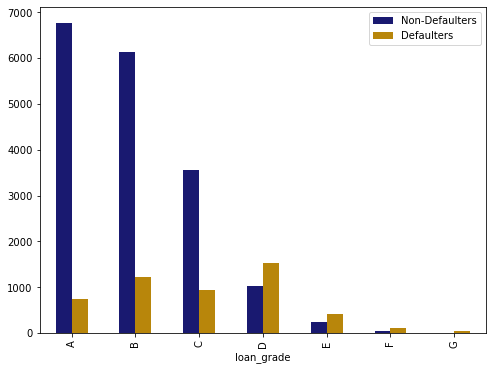

In [25]:

a= dfclean[dfclean['loan_status']==1].groupby('loan_grade').size().sort_values(ascending=False)
b =dfclean[dfclean['loan_status']==0].groupby('loan_grade').size().sort_values(ascending=False)
grade =pd.DataFrame(pd.concat([b,a],axis=1))
grade.columns=['Non-Defaulters','Defaulters']
print(grade)
grade.plot(kind='bar',figsize=(8,6),color=['#191970','#b8860b']);

In [26]:
# colors = ['#191970','#b8860b','#f0e68c','#f6eabe']
fig = go.Figure(data=[go.Pie(
                             labels = dfclean['person_home_ownership'].value_counts().index.values,
                             values =dfclean['person_home_ownership'].value_counts().values)],
                      
               )
fig.update_traces(hoverinfo ='label+percent',textfont_size =10,
                 textinfo='label+percent',pull=[0.1,0,0.1,0],
                            marker = dict(colors = ['#191970','#b8860b','#f0e68c','#2a52be'],
                                          line=dict(color = '#FFFFFF',width = 2)))

fig

                           Non-Defaulters  Defaulters
cb_person_default_on_file                            
Y                                    2491        1555
N                                   15322        3479


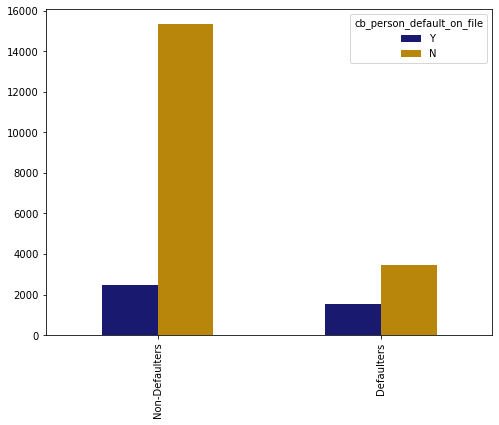

In [27]:
a= dfclean[dfclean['loan_status']==1].groupby('cb_person_default_on_file').size().sort_values()
b =dfclean[dfclean['loan_status']==0].groupby('cb_person_default_on_file').size().sort_values()
grade =pd.DataFrame(pd.concat([b,a],axis=1))
grade.columns=['Non-Defaulters','Defaulters']
print(grade)
grade.transpose().plot(kind='bar',figsize=(8,6),color=['#191970','#b8860b']);

In [28]:
print('Defaulters:')
print('Proportion of Defaulters on file',round(grade.iloc[0,1]/grade['Defaulters'].sum(axis=0)*100,3),'%')
print('Proportion of Defaultesr NOT on file',round(grade.iloc[1,1]/grade['Defaulters'].sum(axis=0)*100,3),'%')
print('---------------------------------------------------------------------------------------------------------------')
print('Non-Defaulters:')
print('Proportion of Non-Defaulters in file',round(grade.iloc[0,0]/grade['Non-Defaulters'].sum(axis=0)*100,3),'%')
print('Proportion of Non-Defaultesr NOT on file',round(grade.iloc[1,0]/grade['Non-Defaulters'].sum(axis=0)*100,3),'%')

Defaulters:
Proportion of Defaulters on file 30.89 %
Proportion of Defaultesr NOT on file 69.11 %
---------------------------------------------------------------------------------------------------------------
Non-Defaulters:
Proportion of Non-Defaulters in file 13.984 %
Proportion of Non-Defaultesr NOT on file 86.016 %


Which borrowers' loan intention are likely to to be defaulters?

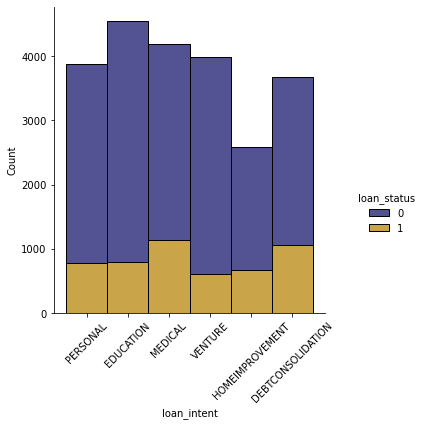

<Figure size 576x720 with 0 Axes>

In [29]:
sns.displot(data=dfclean ,x = "loan_intent", hue = "loan_status",multiple='stack',palette=['#191970','#b8860b'])
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.figure(figsize=(8,10));

# PART 2
dfclean.columns

In [30]:
# sns.displot(data=dfclean ,x ="loan_intent", hue ='loan_grade',multiple='stack')
# # ,palette=['#191970','#b8860b'])
# locs, labels = plt.xticks()
# plt.setp(labels, rotation=45)
# plt.figure(figsize=(6,8));

subseting nueric data only

In [31]:
df_numeric =dfclean.select_dtypes('number')
for cols in df_numeric.columns:
    print(cols)
df_numeric.columns

person_age
person_income
person_emp_length
loan_amnt
loan_int_rate
loan_status
loan_percent_income
cb_person_cred_hist_length


Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

<Figure size 576x432 with 0 Axes>

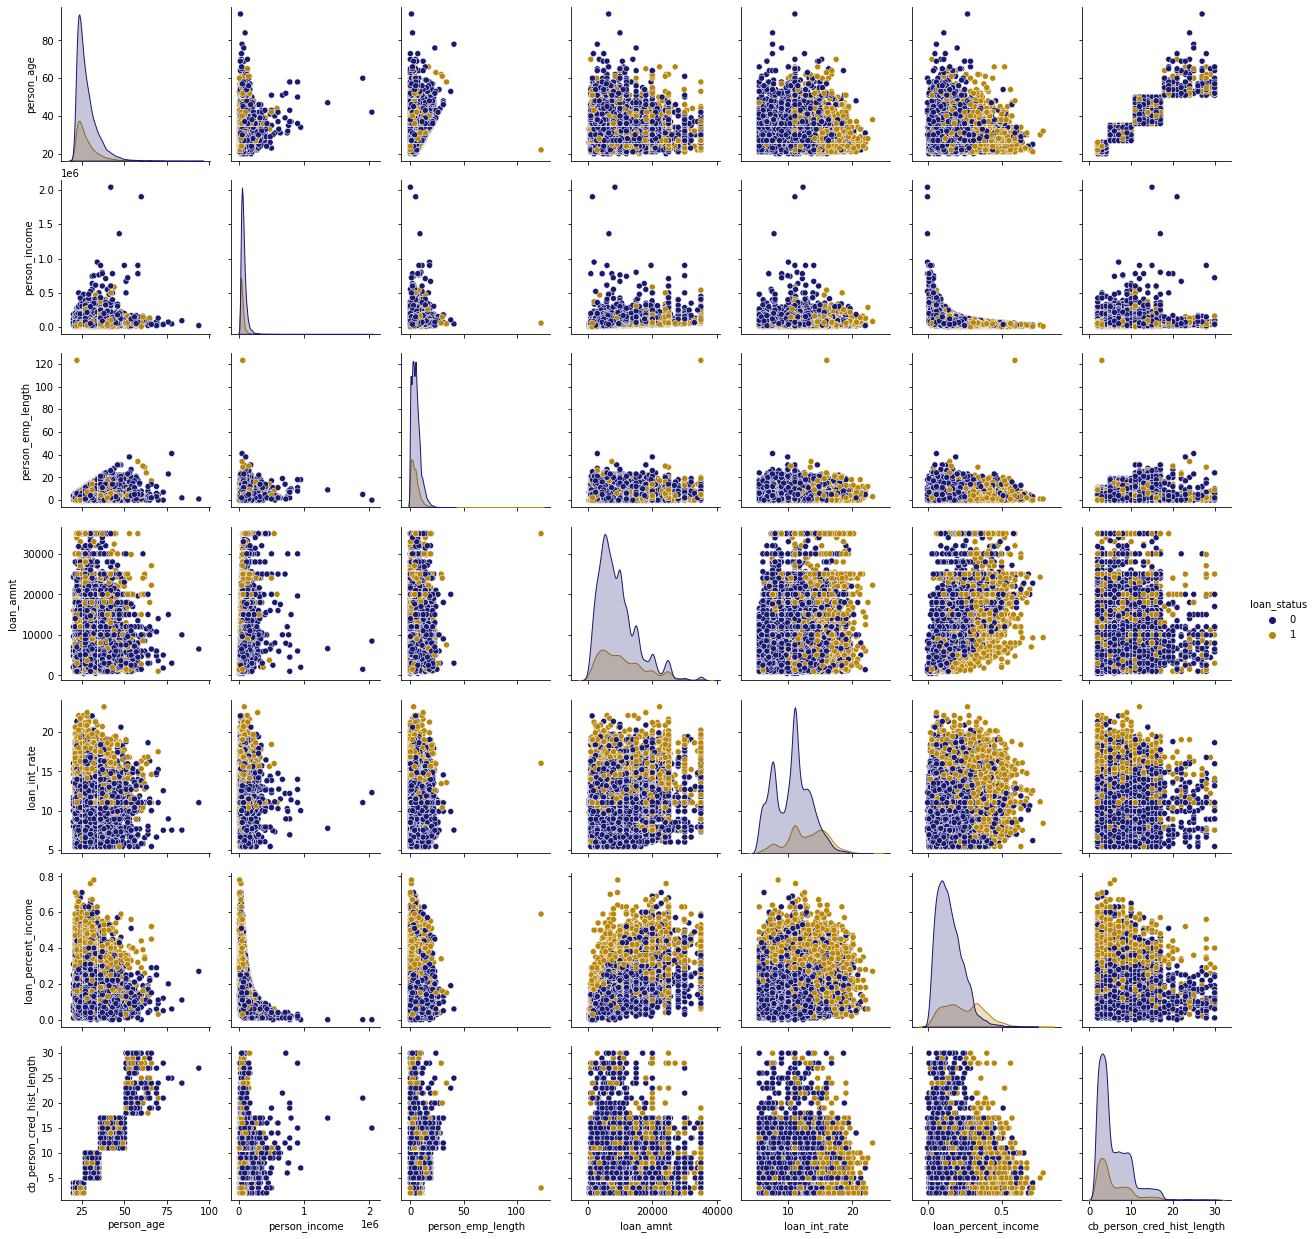

In [32]:
plt.figure(figsize=(8,6))
sns.pairplot(df_numeric,hue = 'loan_status',palette=['#191970','#b8860b'])

In [33]:
numeric_col = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 
               'loan_percent_income','cb_person_cred_hist_length']
for cols in numeric_col:
    print(cols)

person_age
person_income
person_emp_length
loan_amnt
loan_int_rate
loan_status
loan_percent_income
cb_person_cred_hist_length


<Figure size 432x288 with 0 Axes>

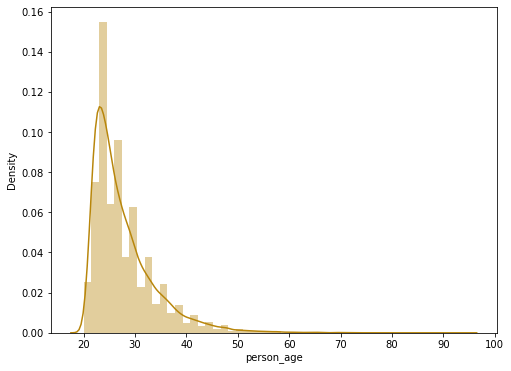

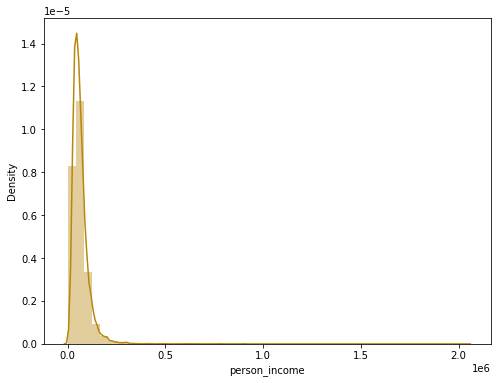

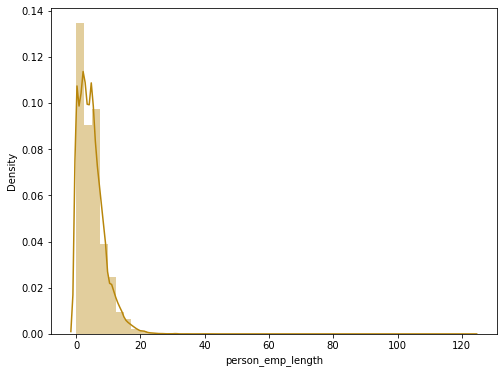

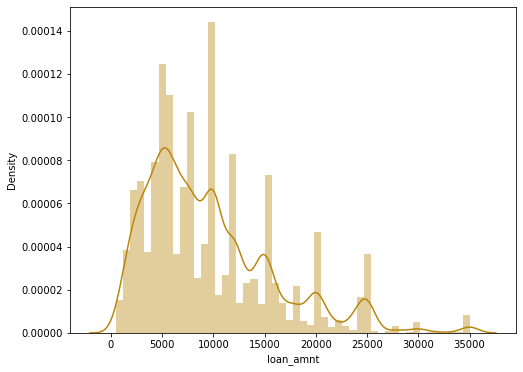

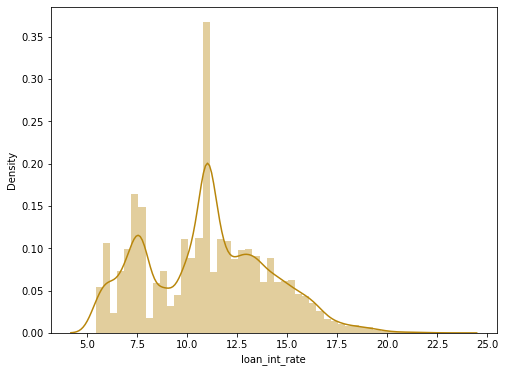

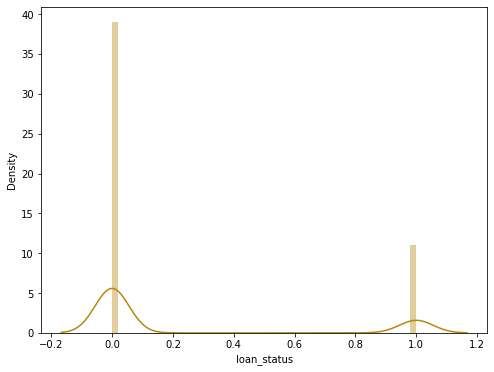

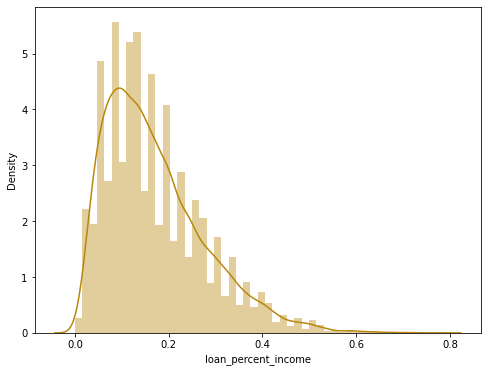

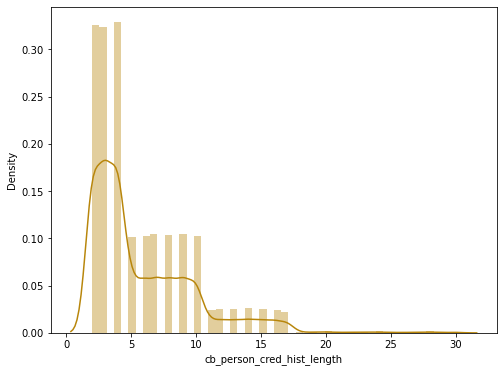

In [34]:
for i, col in enumerate(df_numeric.columns):
    plt.figure(i)
    plt.figure(figsize=(8,6))
    sns.distplot(df_numeric[col],color='#b8860b',kde=True)
   

Bucketting the loan amount into 4 groups

In [35]:
df_numeric["loan_amnt"].aggregate(['min','max'])

min      500
max    35000
Name: loan_amnt, dtype: int64

In [36]:
# Loan intervals
Loan_band = [500,5000,10000,20000,35000]

# create age bins
Groups = []
for i in range(4):
    Groups.append([Loan_band[i],Loan_band[i+1]])

# binning the data
for b in Groups:
    df_numeric.loc[df_numeric['loan_amnt'].between(left=b[0], right=b[1], inclusive='right'), 'Loan_Amount_Group'] = f'({b[0]},{b[1]}]'
df_numeric["Loan_Amount_Group"].value_counts()
df_numeric.head()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0          22          59000              123.0      35000          16.02   
1          21           9600                5.0       1000          11.14   
2          23          65500                4.0      35000          15.23   
3          21           9900                2.0       2500           7.14   
4          26          77100                8.0      35000          12.42   

   loan_status  loan_percent_income  cb_person_cred_hist_length  \
0            1                 0.59                           3   
1            0                 0.10                           2   
2            1                 0.53                           2   
3            1                 0.25                           2   
4            1                 0.45                           3   

  Loan_Amount_Group  
0     (20000,35000]  
1        (500,5000]  
2     (20000,35000]  
3        (500,5000]  
4     (20000,35000]

Non-Defaulters:
  Loan_Amount_Group  size
0     (10000,20000]  4642
1     (20000,35000]   971
2        (500,5000]  5267
3      (5000,10000]  6929
------------------------------------------------------------------------------------------------------------------
Defaulters:
  Loan_Amount_Group  size
0     (10000,20000]  1601
1     (20000,35000]   529
2        (500,5000]  1397
3      (5000,10000]  1507


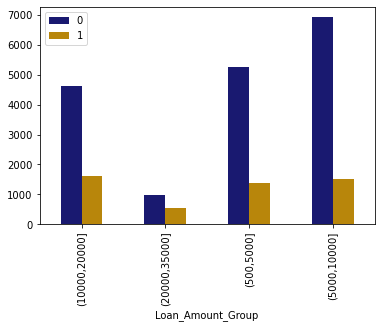

In [37]:
a_1=df_numeric[df_numeric['loan_status']==0].groupby(['Loan_Amount_Group']).size()
a_1.columns=[['Group','Number']]
print('Non-Defaulters:')
print(df_numeric[df_numeric['loan_status']==0].groupby(['Loan_Amount_Group'],as_index=False).size())
print('------------------------------------------------------------------------------------------------------------------')
print('Defaulters:')
print(df_numeric[df_numeric['loan_status']==1].groupby(['Loan_Amount_Group'],as_index=False).size())
a_2=df_numeric[df_numeric['loan_status']==1].groupby(['Loan_Amount_Group']).size()
a_2.columns=[['Group','Number']]
a12= pd.concat([a_1,a_2],axis=1)
a12.plot(kind='bar',color=['#191970','#b8860b']);

In [38]:
dice_1 = np.random.randint(1,7,5000)
dice_2 = np.random.randint(1,7,5000)
dice_sum = dice_1  + dice_2
fig = px.histogram(dice_sum,
                   nbins=11,
                   labels = {'value':'Dice Roll'},
                  title= '5000 Dice Roll Histogram',
                 marginal ='violin',
                color_discrete_sequence =['green'] )

fig.update_layout(
xaxis_title_text = 'Dice Roll',
yaxis_title_text = 'Dice Sum',
bargap = 0.2,showlegend=False
)
df_tips = px.data.tips()
px.histogram(df_numeric,x= 'person_age',color = 'loan_status')


In [39]:
dfclean.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

<Figure size 432x576 with 0 Axes>

<Figure size 432x864 with 0 Axes>

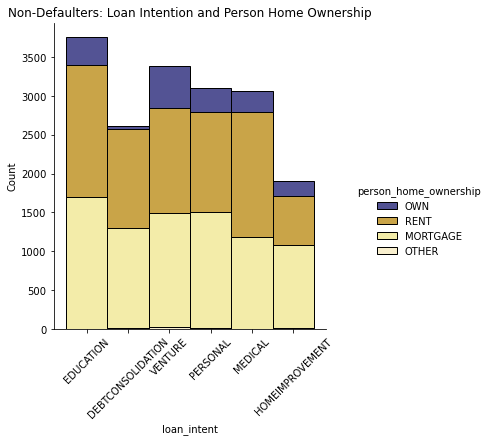

<Figure size 432x576 with 0 Axes>

In [40]:

plt.figure(figsize=(6,12))
sns.displot(data=dfclean[dfclean['loan_status']==0] ,x = "loan_intent", hue = "person_home_ownership",
            palette= ['#191970','#b8860b','#f0e68c','#f6eabe'],multiple='stack')
plt.title('Non-Defaulters: Loan Intention and Person Home Ownership')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.figure(figsize=(6,8))


2.Defaulters


[None, None, None, None, None, None, None, None, None, None, None, None]

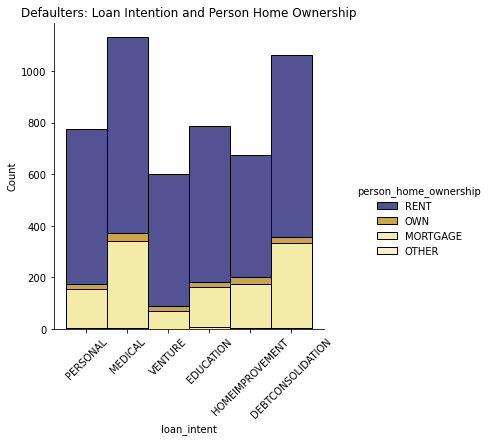

In [41]:
print('2.Defaulters')
sns.displot(data=dfclean[dfclean['loan_status']==1] ,x = "loan_intent", hue = "person_home_ownership",multiple='stack'
,palette= ['#191970','#b8860b','#f0e68c','#f6eabe'])
plt.title('Defaulters: Loan Intention and Person Home Ownership')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

<Figure size 432x864 with 0 Axes>

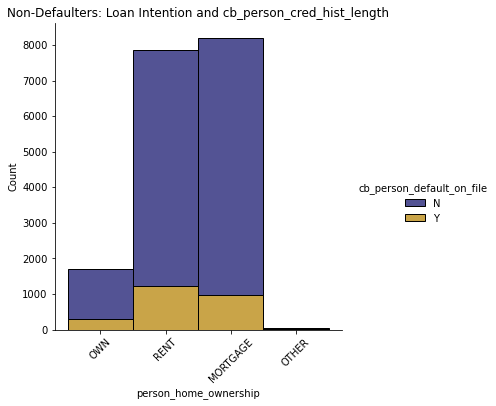

<Figure size 432x576 with 0 Axes>

In [42]:
plt.figure(figsize=(6,12))
sns.displot(data=dfclean[dfclean['loan_status']==0] ,x = "person_home_ownership", hue = "cb_person_default_on_file",
            multiple='stack',palette= ['#191970','#b8860b'])
plt.title('Non-Defaulters: Loan Intention and cb_person_cred_hist_length')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.figure(figsize=(6,8))
dfclean.columns

<Figure size 432x576 with 0 Axes>

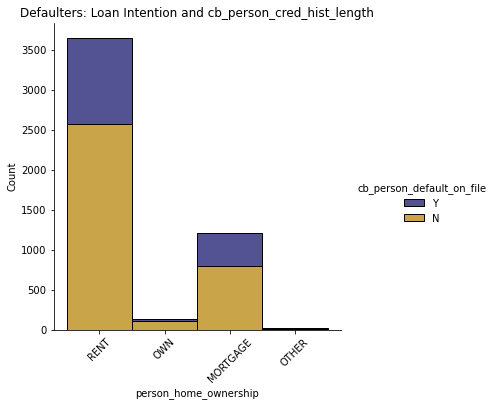

<Figure size 432x576 with 0 Axes>

In [43]:
sns.displot(data=dfclean[dfclean['loan_status']==1] ,x = "person_home_ownership", hue = "cb_person_default_on_file",
            multiple='stack',palette= ['#191970','#b8860b'])
plt.title('Defaulters: Loan Intention and cb_person_cred_hist_length')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.figure(figsize=(6,8))

[None, None, None, None, None, None, None, None, None, None, None, None]

<Figure size 432x864 with 0 Axes>

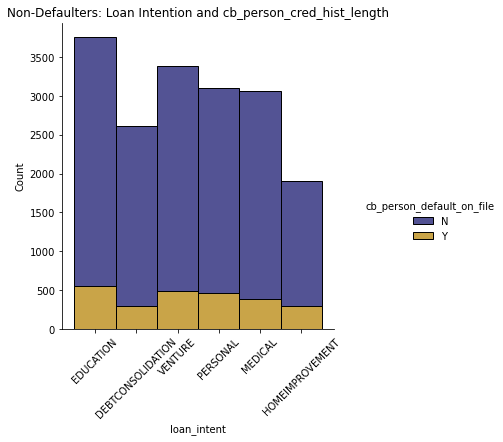

In [44]:
plt.figure(figsize=(6,12))
sns.displot(data=dfclean[dfclean['loan_status']==0] ,x = "loan_intent", hue = "cb_person_default_on_file",multiple='stack',
            palette= ['#191970','#b8860b'])
plt.title('Non-Defaulters: Loan Intention and cb_person_cred_hist_length')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

<Figure size 432x576 with 0 Axes>

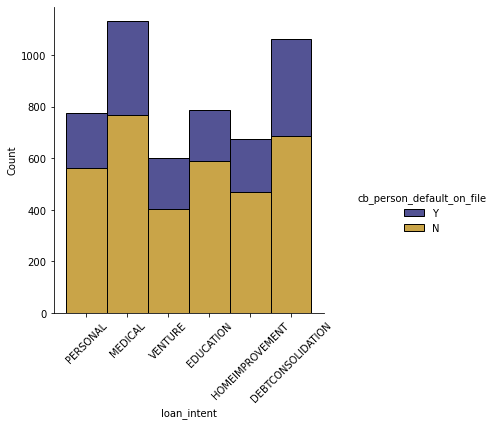

<Figure size 432x576 with 0 Axes>

In [45]:
sns.displot(data=dfclean[dfclean['loan_status']==1] ,x = "loan_intent", hue = "cb_person_default_on_file",
             palette= ['#191970','#b8860b'],multiple='stack')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.figure(figsize=(6,8))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 432x288 with 0 Axes>

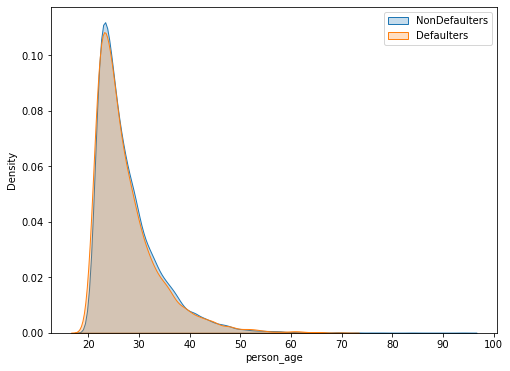

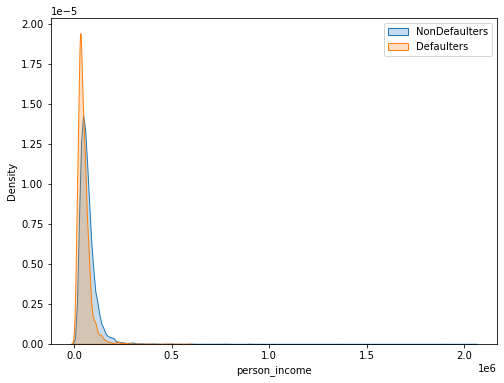

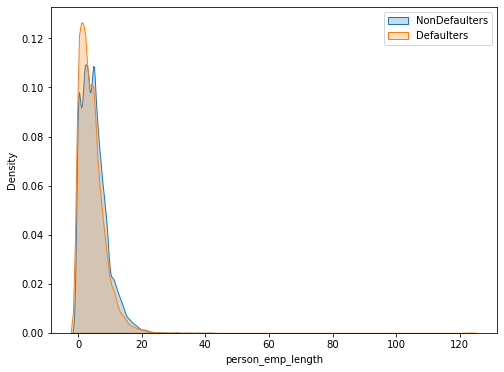

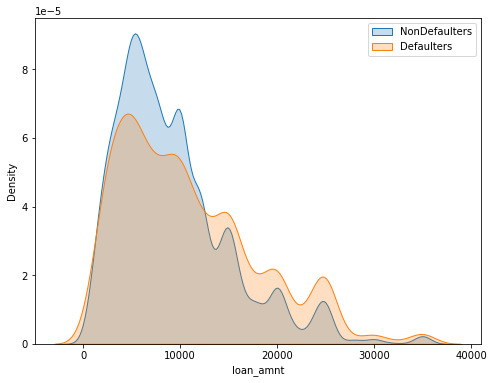

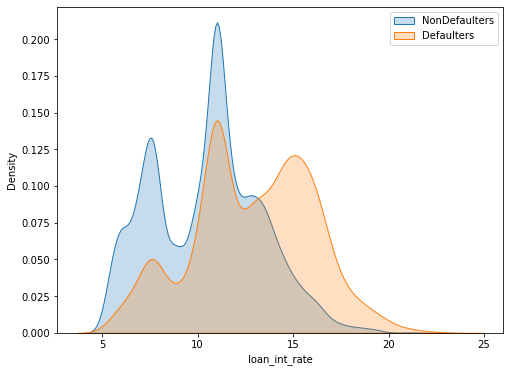

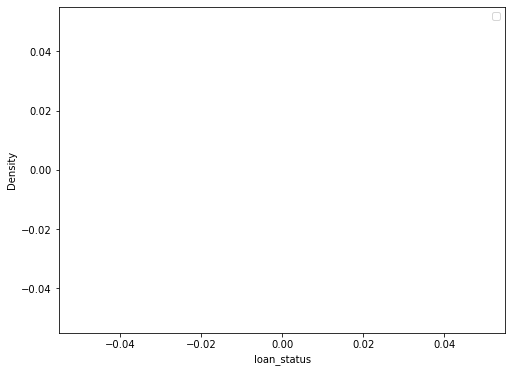

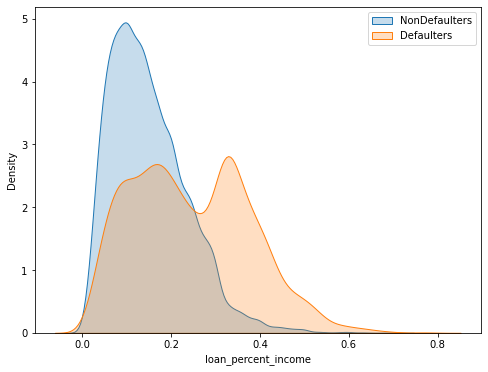

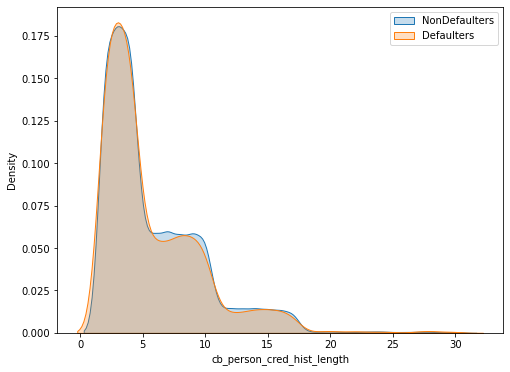

In [46]:
d=df_numeric.iloc[:,:-1]

for i,col in enumerate(d.columns):
    plt.figure(i)
    plt.figure(figsize=(8,6))
    
    sns.kdeplot(d[d['loan_status']==0][col],shade=True,palette= ['#191970','#b8860b'],label='NonDefaulters')
    sns.kdeplot(d[d['loan_status']==1][col],shade=True,palette= ['#191970','#b8860b'],label='Defaulters')
    plt.legend();

# Predictive Analytics

In [47]:
df.select_dtypes('object').columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [48]:
#prepare
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline

#models
from sklearn.linear_model import LogisticRegression
from  sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

#Model Evalution
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay,roc_curve

In [49]:
target ='loan_status'
y = dfclean[target]
X = dfclean.drop(columns = target)
print("target shape:",y.shape)
print('features shape:',X.shape)

target shape: (22847,)
features shape: (22847, 11)


In [50]:
#Encoding
from sklearn import preprocessing 
en = preprocessing.OrdinalEncoder()
X_en = en.fit_transform(X)

In [51]:
#Imputing
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imp= imp_mean.fit_transform(X_en)

In [52]:
#Standardization
scaler = StandardScaler()
X_sc = scaler.fit_transform(X_imp)

In [53]:
#partituoning data
X_train,X_test,y_train,y_test = train_test_split(X_sc,y,test_size=0.3,random_state=42)
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',X_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (15992, 11)
X_test shape: (6855, 11)
y_train shape: (15992, 11)
y_test shape: (6855,)


# Logistic Regression

In [96]:
#model
lrg = LogisticRegression(max_iter= 100, multi_class= 'auto', penalty='l2', solver= 'lbfgs')
md = lrg.fit(X_train,y_train)

In [97]:
#predict 
y=md.predict(X_test)

In [98]:
#Evaluate
accuracy_score(y,y_test)

0.8398249452954049

In [99]:
#Confusion Matrix
confusion_matrix(y,y_test)

array([[5048,  853],
       [ 245,  709]], dtype=int64)

In [100]:
#Classification report
print(classification_report(y,y_test))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      5901
           1       0.45      0.74      0.56       954

    accuracy                           0.84      6855
   macro avg       0.70      0.80      0.73      6855
weighted avg       0.88      0.84      0.85      6855



# Logistic Regression Tuning

In [94]:
param_grid = dict(
         penalty = ['l1', 'l2', 'elasticnet', 'none'],
         solver = ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga'],
         multi_class= ['auto','ovr','multinomial'],
         max_iter = [100,120,130,140,150,160,170,180,190,200]
)

md = LogisticRegression()
grid_sea = GridSearchCV(md,param_grid =param_grid, cv=5, verbose=True)
grid_sea.fit(X_train,y_train)
print(grid_sea.best_params_, grid_sea.best_score_)
y_pred=grid_sea.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y,y_test))

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
{'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'} 0.845797633367682
0.8398249452954049
[[5048  853]
 [ 245  709]]


# RandomForest Classifier

In [139]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestRegressor(criterion = 'mse',random_state = 4,max_features ='auto',
                                   max_depth = 300,n_estimators = 4)
classifier.fit(X_train,y_train)

y_p1= classifier.predict(X_test)
y_p1 = np.where(y_pred>=0.6,1,0)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
print(accuracy_score(y_test,y_p1))
print(confusion_matrix(y_test,y_p1))
print(classification_report(y_test,y_p1))
print(f1_score(y_test,y_p1))

0.9261852662290299
[[5282   11]
 [ 495 1067]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      5293
           1       0.99      0.68      0.81      1562

    accuracy                           0.93      6855
   macro avg       0.95      0.84      0.88      6855
weighted avg       0.93      0.93      0.92      6855

0.8083333333333333


In [141]:
param = dict(
n_estimators = [100,120,140,160,180,200,220,240,260,280,300],
max_depth= np.arange(1,11),
max_features = ['sqrt','log2','auto'],
random_state=np.arange(1,11),
criterion = ['mse','gini','entropy','log_loss'],
)
classifier1 = RandomForestRegressor()
grid_se = GridSearchCV(classifier1,param_grid = param, cv=5, verbose=True)
grid_se.fit(X_train,y_train)
print(grid_se.best_params_, grid_sea.best_score_)
y_pred=grid_se.predict(X_test)
y_p1 = np.where(y_pred>=0.6,1,0)

print(accuracy_score(y_p1,y_test))
print(confusion_matrix(y_p1,y_test))
print(classification_report(y_p1,y_test))

Fitting 5 folds for each of 13200 candidates, totalling 66000 fits


KeyboardInterrupt: 

In [145]:
from sklearn.tree import DecisionTreeClassifier
clf_entropy = DecisionTreeClassifier(criterion = "entropy", 
                       random_state = 100,
                       max_depth=6,
                       min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)
y_pred_en = clf_entropy.predict(X_test)

print(accuracy_score(y_test,y_p1))
print(confusion_matrix(y_test,y_pred_en))
print(classification_report(y_test,y_pred_en))
print(f1_score(y_test,y_pred_en))

0.9261852662290299
[[5279   14]
 [ 539 1023]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      5293
           1       0.99      0.65      0.79      1562

    accuracy                           0.92      6855
   macro avg       0.95      0.83      0.87      6855
weighted avg       0.93      0.92      0.91      6855

0.7872258560984994


In [ ]:
param1 = dict(
n_estimators = [100,120,140,160,180,200,220,240,260,280,300],
max_depth= np.arange(1,11),
max_features = ['sqrt','log2','auto'],
random_state=np.arange(1,11),
criterion = ['mse','gini','entropy','log_loss'],
)
classifier2 = DecisionTreeClassifier()
grid_se = GridSearchCV(classifier2,param_grid = param1, cv=5, verbose=True)
grid_se.fit(X_train,y_train)
print(grid_se.best_params_, grid_sea.best_score_)
y_pred=grid_se.predict(X_test)
y_p1 = np.where(y_pred>=0.6,1,0)

print(accuracy_score(y_p1,y_test))
print(confusion_matrix(y_p1,y_test))
print(classification_report(y_p1,y_test))

In [ ]:
# criterion = "entropy",
# random_state = 100,
# max_depth=3, 
# min_samples_leaf=5